<a href="https://colab.research.google.com/github/Chitra0307/Predicting_Cyberbullying_Infosys_Internship_Oct24/blob/Participants_Codes/Predicting_Cyberbullying_Raswanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       

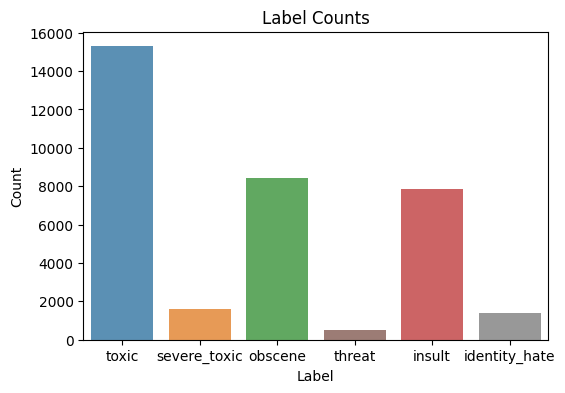

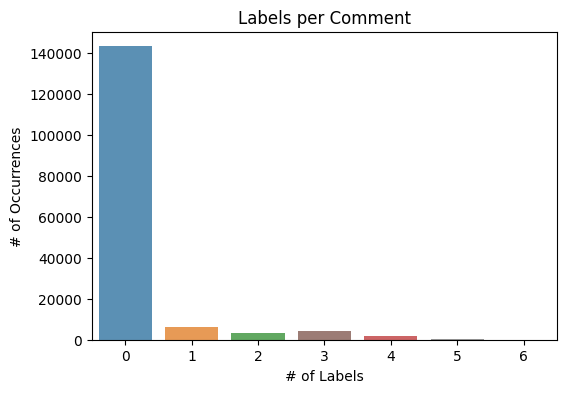

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Naive Bayes Model Evaluation
roc_auc: 0.8604178106899295
accuracy: 0.8997963340122199
classification report
               precision    recall  f1-score   support

        toxic       0.99      0.19      0.32      3056
 severe_toxic       0.00      0.00      0.00       321
      obscene       0.98      0.11      0.20      1715
       threat       1.00      0.01      0.03        74
       insult       0.97      0.05      0.10      1614
identity_hate       0.00      0.00      0.00       294

    micro avg       0.98      0.12      0.22      7074
    macro avg       0.66      0.06      0.11      7074
 weighted avg       0.90      0.12      0.21      7074
  samples avg       0.02      0.01      0.01      7074

Logistic Regression Model Evaluation
roc_auc: 0.9788611968418081
accuracy: 0.9180322732257559
classification report
               precision    recall  f1-score   support

        toxic       0.90      0.62      0.74      3056
 severe_toxic       0.58      0.28      0.37       321
  

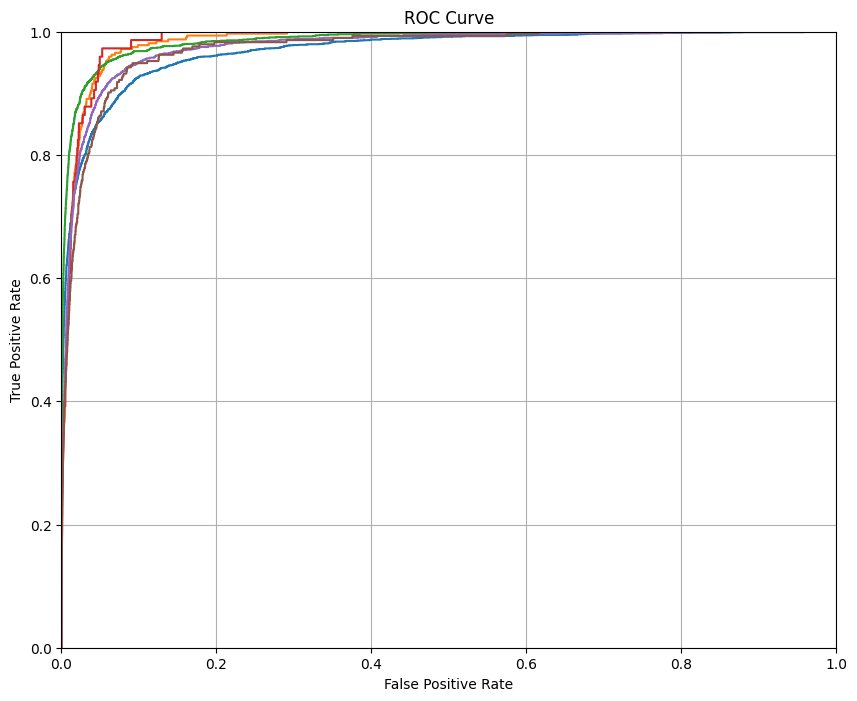

In [3]:
# Import Modules
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, classification_report

import warnings
warnings.filterwarnings('ignore')

# Load the Dataset
df = pd.read_csv('train.csv')
print(df.head())

# Dataset Stats
print(df.describe())

# Dataset Info
print(df.info())

# Check for null values
print(df.isnull().sum())

# Exploratory Data Analysis
x = df.iloc[:, 2:].sum()  # Take only label columns
print(x)

rowsums = df.iloc[:, 2:].sum(axis=1)  # Take label columns and sum them row-wise
print(rowsums)

no_label_count = (rowsums == 0).sum()  # Counting comments with no labels
print(f'Total number of comments without labels: {no_label_count}')
print(f'Total labels: {x.sum()}')

# Plot Label Counts
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8, palette=['tab:blue', 'tab:orange', 'tab:green', 'tab:brown', 'tab:red', 'tab:grey'])
plt.title('Label Counts')
plt.ylabel('Count')
plt.xlabel('Label')
plt.show()

# Plot Labels per Comment
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=rowsums.values, alpha=0.8, palette=['tab:blue', 'tab:orange', 'tab:green', 'tab:brown', 'tab:red', 'tab:grey'])
plt.title('Labels per Comment')
plt.ylabel('# of Occurrences')
plt.xlabel('# of Labels')
plt.show()

# Data Preprocessing
df = df.drop(columns=['id'], axis=1)

# Remove stopwords
import nltk
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if w not in stopwords]
    return " ".join(no_stopword_text)

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

# Stemming
stemmer = SnowballStemmer('english')
def stemming(sentence):
    stemmed_sentence = " ".join([stemmer.stem(word) for word in sentence.split()])
    return stemmed_sentence

# Apply the preprocessing functions
df['comment_text'] = df['comment_text'].apply(lambda x: remove_stopwords(x))
df['comment_text'] = df['comment_text'].apply(lambda x: clean_text(x))
df['comment_text'] = df['comment_text'].apply(lambda x: stemming(x))

# Split input and output
X = df['comment_text']
y = df.drop(columns=['comment_text'], axis=1)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline and model
NB_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb_model', OneVsRestClassifier(MultinomialNB(), n_jobs=-1))
])

LR_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('lr_model', OneVsRestClassifier(LogisticRegression(), n_jobs=-1))
])

# Function to run the pipeline and evaluate
def run_pipeline(pipeline, X_train, X_test, y_train, y_test):
    # Train model
    pipeline.fit(X_train, y_train)

    # Predict from model
    predictions = pipeline.predict(X_test)
    pred_probs = pipeline.predict_proba(X_test)

    # Print metrics
    print('roc_auc:', roc_auc_score(y_test, pred_probs))
    print('accuracy:', accuracy_score(y_test, predictions))
    print('classification report')
    print(classification_report(y_test, predictions, target_names=y_train.columns))

# Run Naive Bayes Pipeline
print("Naive Bayes Model Evaluation")
run_pipeline(NB_pipeline, X_train, X_test, y_train, y_test)

# Run Logistic Regression Pipeline
print("Logistic Regression Model Evaluation")
run_pipeline(LR_pipeline, X_train, X_test, y_train, y_test)

# Test Prediction
labels = y_train.columns.values
sentence = 'hello dick wikipedia fuckwhit ban'
stemmed_sentence = stemming(sentence)
results = LR_pipeline.predict([stemmed_sentence])[0]
print(f"Prediction for: {sentence}")
for label, result in zip(labels, results):
    print(f"{label:14} {result}")

sentence = 'hello how are you doing'
stemmed_sentence = stemming(sentence)
results = LR_pipeline.predict([stemmed_sentence])[0]
print(f"Prediction for: {sentence}")
for label, result in zip(labels, results):
    print(f"{label:14} {result}")

sentence = 'I will kill you'
stemmed_sentence = stemming(sentence)
results = LR_pipeline.predict([stemmed_sentence])[0]
print(f"Prediction for: {sentence}")
for label, result in zip(labels, results):
    print(f"{label:14} {result}")


sentence = 'you are such a faggot'
stemmed_sentence = stemming(sentence)
results = LR_pipeline.predict([stemmed_sentence])[0]
print(f"Prediction for: {sentence}")
for label, result in zip(labels, results):
    print(f"{label:14} {result}")



# ROC Curve Plotting
def plot_roc_curve(test_labels, pred_probs):
    fpr, tpr, thresholds = roc_curve(test_labels, pred_probs)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

def plot_pipeline_roc_curve(pipeline, X_train, X_test, y_train, y_test):
    for label in labels:
        pipeline.fit(X_train, y_train[label])
        pred_probs = pipeline.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test[label], pred_probs)

# Plot ROC curves for Logistic Regression model
plt.figure(figsize=(10, 8))
plot_pipeline_roc_curve(LR_pipeline, X_train, X_test, y_train, y_test)
plt.show()
